In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_img_plt(img, c_map ='gray', fig_hight=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

In [3]:
def show_mult_img(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

## 1. Find and plot the lines in the image (a.jpg), for edges with intensity more than 150. andVotes more than 200, show the line with thickness = 2, and with the color pure green! (Lower threshold for canny = 100, Other parameters = Desired)

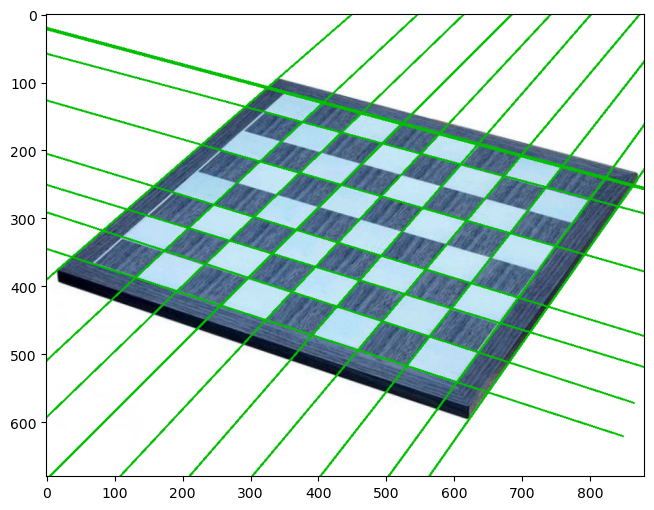

In [4]:
img2 = cv2.imread('media/a.jpg', -1)

gray_img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray_img, 100, 150, 9)

lines = cv2.HoughLines(edges, 1, np.pi/180, 200)


# Loop through each line in the array of lines
for line in lines:
    # Extract the polar coordinates (rho and theta) of the line
    rho, theta = line[0]
    
    # Calculate the sine and cosine of the angle theta
    a = np.cos(theta)
    b = np.sin(theta)
    
    # Calculate the coordinates of a point on the line (x0, y0)
    x0 = rho * a
    y0 = rho * b
    
    # Calculate the start point of the line by moving 1000 pixels perpendicular to the line
    # L = 1000
    # Move 1000 pixels above the point (x0,y0) to draw the line
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000 * (a))
    
    # Calculate the end point of the line by moving 1000 pixels in the opposite direction
    # L = 1000
    # Move 1000 pixels below the point (x0,y0) to draw the line
    x2 = int(x0 - 1000 *(-b))
    y2 = int(y0 - 1000 * a)
    
    # Draw the line on the image with thickness of 2 pixels and color (255, 0, 255)
    cv2.line(img2, (x1, y1), (x2, y2), (0, 191, 0), 2)
    # arguments: background imge, start point, finish point, color, thickness
    
# Show the resulting image
show_img_plt(img2)

## 2. Find and plot the Circles in the image (b.jpg), for pixels with intensity greater than 120

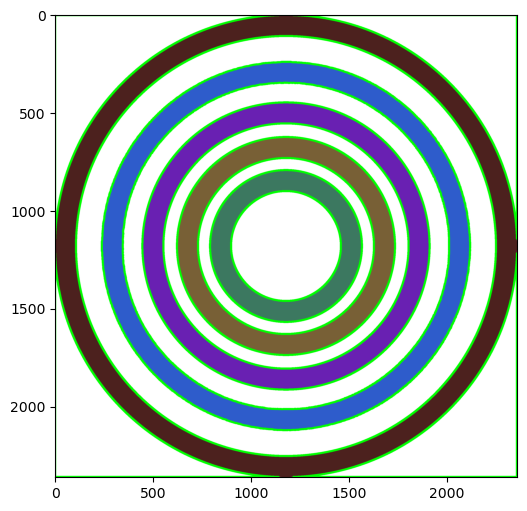

In [5]:
# Load the circle and background images
circle_img = cv2.imread('media/b.jpg', 0)
bakgrnd_img = cv2.imread('media/b.jpg', 1)

# Perform denoising on the grayscale circle image
denoised_gray_circle_img = cv2.medianBlur(circle_img, 5)

# Apply a threshold to create a binary image
ret, thresh = cv2.threshold(denoised_gray_circle_img, 120, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the background image
circle_img3 = cv2.drawContours(bakgrnd_img, contours, -1, (0, 255, 0), 10)

# Display the resulting image
show_img_plt(circle_img3)

## 3. Split the 8th frame of the video (lane.mp4) and Denoise that, then find the edges, and finally show the edges on the original frame!


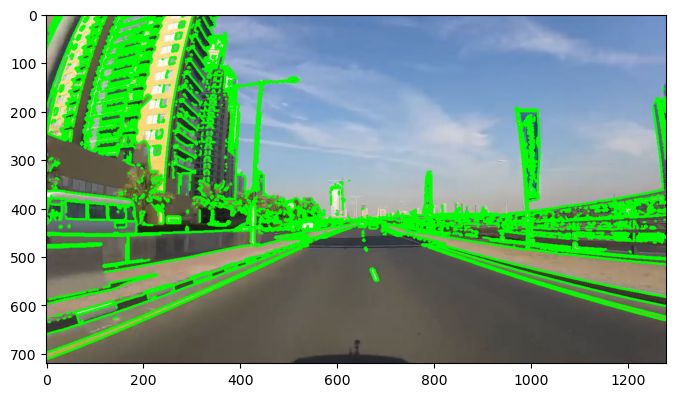

In [6]:
# Argument: video source address or camera index
vid = cv2.VideoCapture('media/lane.mp4')

# Initialize frame count
count = 0
# Loop through frames while keeping track of frame count
while count <= 8:
    count +=1
    # Read the next frame from the video
    ret, frame = vid.read()
    
    # If the frame was not read successfully, print a message and exit the loop
    if not ret:
        print('The frame was not found!')
        break
        
# Convert the color image to grayscale
image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
# Convert the color image to RGB for display purposes
image_color = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# Apply Gaussian blur to the grayscale image
image_blur = cv2.GaussianBlur(image_gray, (3, 3), 0)

# Apply Canny edge detection to the blurred image
canny = cv2.Canny(image=image_blur, threshold1=180, threshold2=190)

# Apply a threshold to create a binary image
ret, thresh = cv2.threshold(canny, 150, 160, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the color image
circle_img3 = cv2.drawContours(image_color, contours, -1, (0, 255, 0), 3)

# Display the resulting image
show_img_plt(circle_img3)
